In [183]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline

In [184]:
data = pd.read_csv("../data/HiBench/csvs/tinysort_run.csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.dropna()
# data 
IPC = list()
for i in data.iterrows():
    if(int(i[1][5]) == 0):
        IPC.append(None)
    else:
        if(int(i[1][1]) / int(i[1][5]) < -0.4 or int(i[1][1]) / int(i[1][5]) > 1):
            IPC.append(None)
        else:
            IPC.append(int(i[1][1]) / int(i[1][5]))
#     print(i[1][4])

data['IPC'] = IPC

In [185]:
data = data.dropna()

In [186]:
data

,Instructions,BranchInstructions,BranchMispredicts,LLCRef,LLCMiss,Cycles,DTLBMiss,ITLBMiss,LLCOcc,TotalBytes,LocalBytes,IPC
0,853415796,188063529,6946352.0,16532099.0,466673.0,839887657,1.162056e+06,859228.0,0.0,0.00,0.00,0.223915
1,837044573,174461991,5504383.0,15389715.0,675621.0,874110744,2.149412e+06,1425667.0,0.0,0.00,0.00,0.199588
2,2820270383,509154108,25615322.0,54864358.0,1507620.0,2494423715,3.527648e+06,1990630.0,0.0,0.00,0.00,0.204117
3,2602309144,462599795,18333791.0,50014767.0,2118281.0,2270219579,3.399502e+06,1695796.0,327680.0,0.52,0.03,0.203769
4,1010283455,187024580,6327639.0,17244601.0,1470389.0,668909628,1.123495e+06,1123495.0,327680.0,0.52,0.03,0.279596
...,...,...,...,...,...,...,...,...,...,...,...,...
18103,-1,-1,-1.0,-1.0,-1.0,-1,-1.000000e+00,235.0,393216.0,0.39,0.29,1.000000
18104,-1,-1,-1.0,-1.0,-1.0,-1,4.980000e+02,102.0,393216.0,0.39,0.29,1.000000
18105,-1,-1,-1.0,-1.0,-1.0,-1,-1.000000e+00,-1.0,393216.0,0.39,0.29,1.000000
18106,-1,-1,-1.0,-1.0,-1.0,-1,6.266010e+05,258.0,393216.0,0.39,0.29,1.000000


In [187]:
from sklearn import preprocessing

In [188]:
# Create x, where x the 'scores' column's values as floats
x = data.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data = pd.DataFrame(x_scaled)

In [189]:
data

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.077020e-11,2.037080e-11,1.992423e-11,2.281322e-11,1.554722e-12,4.553928e-11,1.665288e-12,1.103565e-11,0.000000,0.000000,0.000000,0.223938
1,6.941260e-11,1.889750e-11,1.578823e-11,2.123680e-11,2.250832e-12,4.739488e-11,3.080220e-12,1.831080e-11,0.000000,0.000000,0.000000,0.199611
2,2.338732e-10,5.515092e-11,7.347246e-11,7.570923e-11,5.022632e-12,1.352493e-10,5.055303e-12,2.556700e-11,0.000000,0.000000,0.000000,0.204140
3,2.157986e-10,5.010822e-11,5.258684e-11,6.901711e-11,7.057047e-12,1.230928e-10,4.871663e-12,2.178025e-11,0.006325,0.000617,0.000041,0.203792
4,8.377857e-11,2.025826e-11,1.814958e-11,2.379642e-11,4.898597e-12,3.626873e-11,1.610028e-12,1.442981e-11,0.006325,0.000617,0.000041,0.279617
...,...,...,...,...,...,...,...,...,...,...,...,...
16126,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.031105e-15,0.007590,0.000462,0.000394,1.000000
16127,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.150927e-16,1.322898e-15,0.007590,0.000462,0.000394,1.000000
16128,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.007590,0.000462,0.000394,1.000000
16129,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.979530e-13,3.326509e-15,0.007590,0.000462,0.000394,1.000000


In [190]:
from sklearn.decomposition import PCA

In [191]:
pca = PCA(n_components = 2)

In [192]:
principalComponents = pca.fit_transform(data)

In [193]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['P1', 'P2'])

In [194]:
principalDf

,P1,P2
0,0.266602,-0.269279
1,0.290367,-0.274446
2,0.285943,-0.273484
3,0.287391,-0.268482
4,0.213316,-0.252375
...,...,...
16126,-0.490216,-0.098373
16127,-0.490216,-0.098373
16128,-0.490216,-0.098373
16129,-0.490216,-0.098373


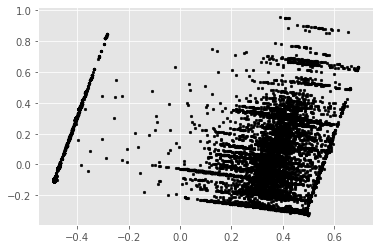

In [195]:
f1 = principalDf['P1'].values
f2 = principalDf['P2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [199]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [205]:
# Number of clusters
k = 2
# X coordinates of random centroids
C_x = np.random.uniform(-1, 1, size=k)
# Y coordinates of random centroids
C_y = np.random.uniform(-1, 1, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[-0.6053051   0.7356191 ]
 [ 0.33136734 -0.34875414]]


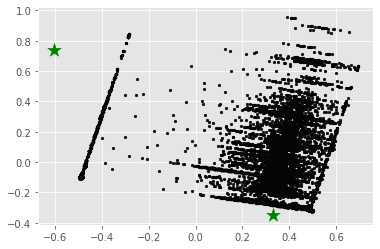

In [206]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [207]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    print(error)

0.8014111
0.015063263
0.00019829707
0.0


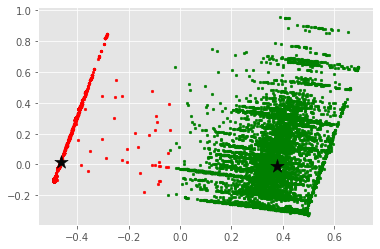

In [208]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [209]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(data)
# Getting the cluster labels
labels = kmeans.predict(data)
# Centroid values
centroids = kmeans.cluster_centers_

In [210]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[-0.46469903  0.01336319]
 [ 0.37802833 -0.01087083]]
[[6.64232444e-04 1.97332391e-04 1.18764517e-03 4.80902661e-03
  6.98851335e-04 5.62340055e-03 8.10086962e-04 5.49967224e-03
  1.25437767e-01 5.05100384e-02 4.01192703e-02 1.68583755e-01]
 [1.82792763e-03 2.57832980e-13 3.63237029e-04 1.64856644e-03
  5.60128732e-05 1.80040011e-13 1.00097981e-03 4.31215603e-03
  1.08414845e-01 5.53184743e-02 2.21213654e-02 9.98695841e-01]
 [1.48820976e-03 1.06914047e-03 1.37246237e-03 3.68238806e-03
  1.94267720e-03 5.19813323e-03 8.55564929e-04 7.33012587e-03
  4.46766804e-01 2.88308690e-01 1.98823429e-01 1.74123008e-01]]


In [212]:
data = pd.read_csv("../data/HiBench/csvs/tinyscan_run.csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data = data.dropna()
# data 
IPC = list()
for i in data.iterrows():
    if(int(i[1][5]) == 0):
        IPC.append(None)
    else:
        if(int(i[1][1]) / int(i[1][5]) < -0.4 or int(i[1][1]) / int(i[1][5]) > 1):
            IPC.append(None)
        else:
            IPC.append(int(i[1][1]) / int(i[1][5]))
#     print(i[1][4])

data['IPC'] = IPC
data = data.dropna()
# Create x, where x the 'scores' column's values as floats
x = data.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data = pd.DataFrame(x_scaled)

In [213]:
labels = kmeans.predict(data)
# Centroid values
# centroids = kmeans.cluster_centers_
for i in labels:
    print(i)

1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
1
1
0
0
1
1
1
1
1
1
1
0
1
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
1
2
1
2
2
2
2
2
1
2
2
2
1
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
1
0
0
0
2
2
2
1
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
2
2
2
2
2
2
1
1
2
2
2
2
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
2
2
2
2
2
1
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
0
0
2
2
2
1
1
2
1
1
1
1
1
2
2
2
2
2
2
2
2
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
0
0
0
0
0
1
1
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
1
1
0
0
0
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
1
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0


0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1


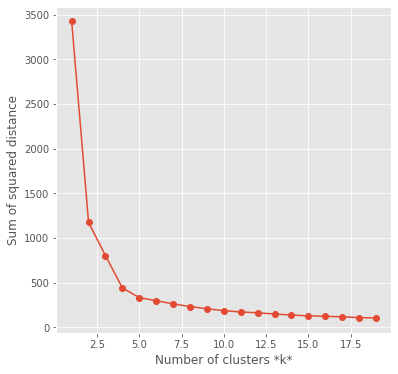

In [215]:
sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');